In [1]:
import epitomes
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm

In [2]:
epitome_texts, epitome_numbers = epitomes.load_epitomes('../epitomes')
with open('csvfiles/overlap_epitome_numbers.txt', 'r', encoding='utf-8') as f:
    nums = [int(num) for num in f.readlines()]
overlap_transcriptions = list(set(epitome_numbers).intersection(set(nums)))
overlap_transcriptions_idx = [i for i in range(len(epitome_numbers)) if epitome_numbers[i] in overlap_transcriptions]

In [3]:
# load the style vectors from csv files
path = 'csvfiles'
tfidf_dict = {}
for filename in os.listdir(path):
    if filename.startswith('tfidf'):
        ngram, rank = re.findall('\d+', filename)
        ngram = int(ngram)
        rank = int(rank)
        if ngram in tfidf_dict:
            tfidf_dict[ngram][rank] = np.genfromtxt(os.path.join(path, filename), delimiter=',')
        else:
            tfidf_dict[ngram] = {}
            tfidf_dict[ngram][rank] = np.genfromtxt(os.path.join(path, filename), delimiter=',')

In [5]:
overlap_tfidf_dict = {}
for n in tfidf_dict:
    overlap_tfidf_dict[n] = {}
    for r in tfidf_dict[n]:
        overlap_tfidf_dict[n][r] = tfidf_dict[n][r][overlap_transcriptions_idx]

In [6]:
ngrams_list = [2, 3, 4]
ranks_list = [100, 200, 300]
# my optimal_k notebook points towards 1 author, but 2 authors is an alternative which we can actually perform concordance with
n_authors = 2
kmean_dict = {}
for ngram in overlap_tfidf_dict:
    kmean_dict[ngram] = {}
    for rank in overlap_tfidf_dict[ngram]:
        # the default number of repeats is 100
        kmean_dict[ngram][rank] = epitomes.repeat_kmeans(overlap_tfidf_dict[ngram][rank], clusters=n_authors)

In [7]:
concordances_dict = {}
for ngram in kmean_dict:
    concordances_dict[ngram] = {}
    for rank in kmean_dict[ngram]:
        concordances_dict[ngram][rank] = epitomes.concordance_heatmap(kmean_dict[ngram][rank])

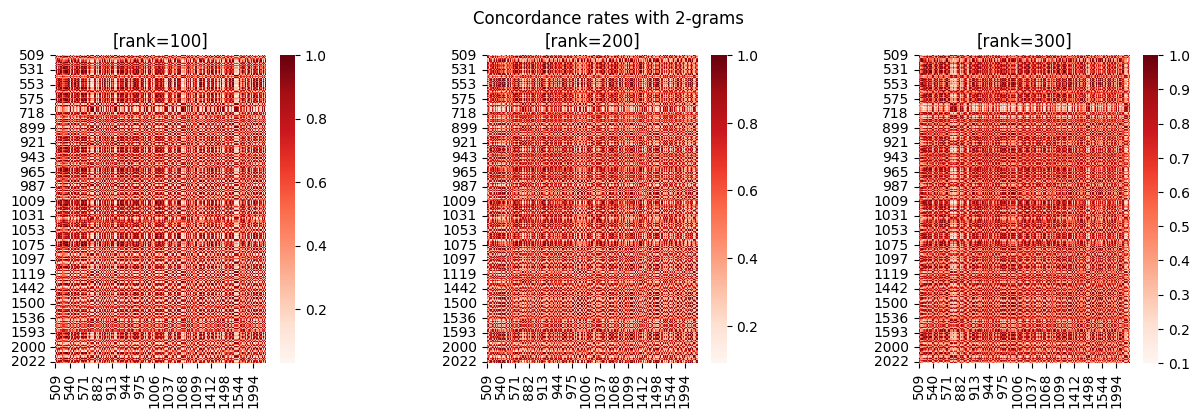

In [8]:
n = 2
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
fig.suptitle(f'Concordance rates with {n}-grams')
plt.tight_layout(w_pad=9)

for idx, ax in enumerate(axes.reshape(-1)):
    sns.heatmap(concordances_dict[n][ranks_list[idx]], cmap='Reds', ax=ax)
    ax.set_title(f'[rank={ranks_list[idx]}]')
    ax.set_yticklabels(overlap_transcriptions[::len(overlap_transcriptions)//len(ax.get_yticks())+1])
    ax.set_xticklabels(overlap_transcriptions[::len(overlap_transcriptions)//len(ax.get_xticks())+1])

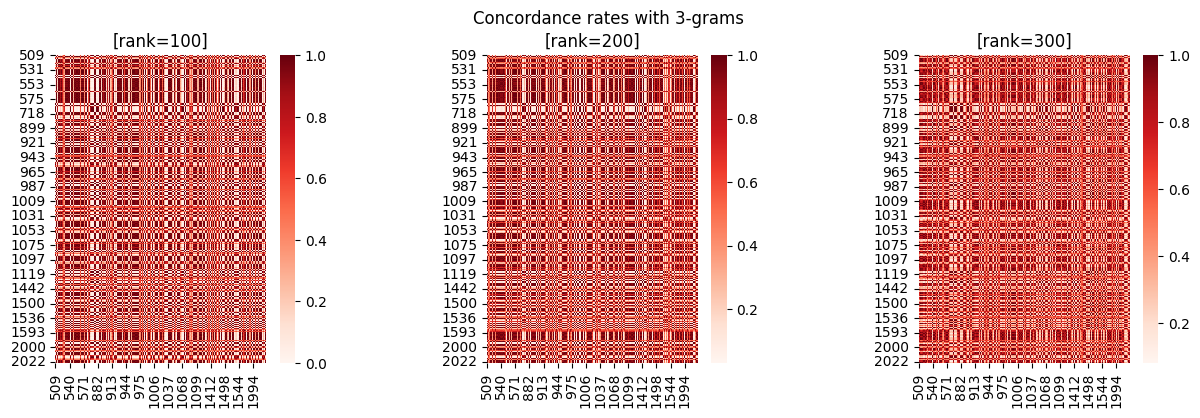

In [9]:
n = 3
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
fig.suptitle(f'Concordance rates with {n}-grams')
plt.tight_layout(w_pad=9)

for idx, ax in enumerate(axes.reshape(-1)):
    sns.heatmap(concordances_dict[n][ranks_list[idx]], cmap='Reds', ax=ax)
    ax.set_title(f'[rank={ranks_list[idx]}]')
    ax.set_yticklabels(overlap_transcriptions[::len(overlap_transcriptions)//len(ax.get_yticks())+1])
    ax.set_xticklabels(overlap_transcriptions[::len(overlap_transcriptions)//len(ax.get_xticks())+1])

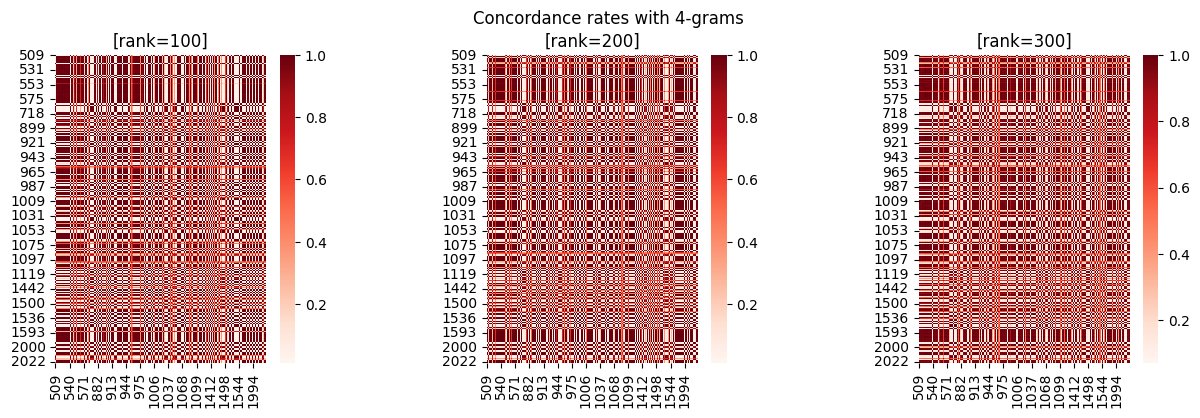

In [10]:
n = 4
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
fig.suptitle(f'Concordance rates with {n}-grams')
plt.tight_layout(w_pad=9)

for idx, ax in enumerate(axes.reshape(-1)):
    sns.heatmap(concordances_dict[n][ranks_list[idx]], cmap='Reds', ax=ax)
    ax.set_title(f'[rank={ranks_list[idx]}]')
    ax.set_yticklabels(overlap_transcriptions[::len(overlap_transcriptions)//len(ax.get_yticks())+1])
    ax.set_xticklabels(overlap_transcriptions[::len(overlap_transcriptions)//len(ax.get_xticks())+1])